In [1]:
import nibabel as nib
import numpy as np
from mri_preproc.paths import hemond_data
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.notebook import tqdm

In [2]:
dataroot = "/mnt/smbShare/3Tpioneer_bids"
dataset = hemond_data.scan_3Tpioneer_bids(dataroot, "t1", "")

In [4]:
dataset[0]

Scan(subid='ms1196', date='20170725', root=PosixPath('/mnt/smbShare/3Tpioneer_bids/sub-ms1196/ses-20170725'), image=PosixPath('/mnt/smbShare/3Tpioneer_bids/sub-ms1196/ses-20170725/t1.nii.gz'), label=None, cond=None)

In [23]:
def display_slices(scan, coords, savepath):
    img = nib.load(scan.image)
    data = img.get_fdata()[:,:,:]

    sag = data[coords[0], :, :]
    cor = data[:, coords[1], :]
    axial = data[:, :, coords[2]]

    plt.subplot(3, 1, 1)
    plt.imshow(sag, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 1, 2)
    plt.imshow(cor, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 1, 3)
    plt.imshow(axial, cmap='gray')
    plt.axis('off')

    plt.savefig(savepath)

In [ ]:
shapes = []
for scan in dataset:
    img = nib.load(scan.image)
    print(scan.subid, img.header.get_data_shape())


In [12]:
dataset.retrieve(subid='ms1030')
dataset.find_scan('ms1030', '20200304')

Scan(subid='ms1030', date='20200304', root=PosixPath('/mnt/e/Data/3Tpioneer_bids/sub-ms1030/ses-20200304'), image=PosixPath('/mnt/e/Data/3Tpioneer_bids/sub-ms1030/ses-20200304/proc/flair-brain-mni_reg.nii.gz'), label=None, cond=None)

  0%|          | 0/1586 [00:00<?, ?it/s]

KeyboardInterrupt: 

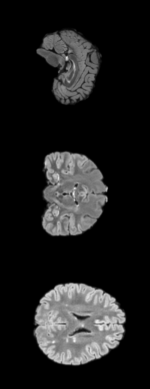

In [37]:
save_dir = Path("/home/srs-9/Projects/ms_mri/figures/3Tpioneer_bids_explore")
coords = (91, 109, 91)
for i in tqdm(range(len(dataset))):
    data = dataset[i]
    savepath = save_dir / f"{data.subid}-{data.date}.png"
    display_slices(data, coords, savepath)
